In [1]:
import numpy as np
from equations_BM import *
from binary_data import *
import pickle
import pylab
import math

In [2]:
def poisson(lam, k):
    return np.divide(float(np.power(lam, k)), math.factorial(k)) * np.exp(-1. * lam)

In [63]:
# predictions (#spikes, prob)
# ycount = np.zeros(11)
ycount = np.zeros(1024)
states = list(product([-1, 1], repeat=10))
for state in range(len(states)):
    p = poisson(sum(np.array(states[state]) == 1), 0)
    ycount[state] = p

In [7]:
# data (spike train > # neurons)
bint = np.loadtxt('bint.txt')
bint = bint[20:30, :]
bint[bint < 0.5] = -1

In [8]:
# observations (count occurrence)
# N = np.shape(bint)[1]
# xcount = np.zeros(11)
# for k in range(N):
#     for j in states:
#         if (np.array(bint[:, k]) == np.array(j)).all():
#             xcount[sum(np.array(j) == 1)] += 1
# print xcount

[  1.93330000e+05   5.48860000e+04   2.33200000e+04   9.21600000e+03
   2.06000000e+03   2.18000000e+02   1.00000000e+01   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


In [11]:
# observations (count occurrence)
N = np.shape(bint)[1]
xcount = np.zeros(1024)
for obs in range(N):
    for state in range(np.shape(states)[0]):
        if (np.array(bint[:, obs]) == np.array(states[state])).all():
            xcount[state] += 1

[ 193330.    8353.    7430. ...,       0.       0.       0.]


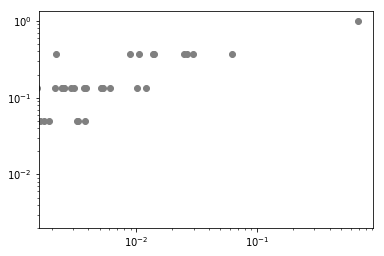

In [70]:
plt.figure()


for i in range(len(np.array(xcount))):
    plt.scatter(xcount[i] / 283041., ycount[i], c="grey")
    
plt.xscale('log')
plt.yscale('log')
plt.show()

In [72]:
# Boltmann predictions
n = 200
w, b, weightlist, wsum, bsum = boltzmann_train(bint, eta=0.01, n_epochs=n)

-123.488045663
-62.3054276718


(1024L, 10L)
